In [ ]:
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
import numpy as np

# Initialize model and tokenizer
model = None
tokenizer = None
max_sequence_length = 3  # You can adjust this value

# Function to generate a sequence from the model
# def generate_seq(enter_text, n_pred):
#     global model, tokenizer, max_sequence_length
#     in_text, result = enter_text, enter_text
#     for _ in range(n_pred):
#         encoded = tokenizer.texts_to_sequences([in_text])[0]
#         encoded = array(encoded)

#         # Reshape the input to match the model's expectations
#         encoded = encoded.reshape(1, -1)

#         yhat = model.predict(encoded)[0]

#         out_word = ''
#         for word, index in tokenizer.word_index.items():
#             if index == np.argmax(yhat):
#                 out_word = word
#                 break
#         in_text, result = out_word, result + ' ' + out_word
#     return result

def generate_seq(enter_text, n_pred):
    global model, tokenizer, max_sequence_length
    in_text, result = enter_text, enter_text
    for _ in range(n_pred):
        # Encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # Ensure the sequence length matches the model's expectations
        encoded = array(encoded[-(max_sequence_length-1):])

        # Reshape the input to match the model's expectations
        encoded = encoded.reshape(1, -1)

        yhat = model.predict(encoded)[0]

        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == np.argmax(yhat):
                out_word = word
                break
        in_text, result = out_word, result + ' ' + out_word
    return result


# Function to train the model
def train_model(data):
    global model, tokenizer, max_sequence_length
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts([data])
    vocab_size = len(tokenizer.word_index) + 1

    encoded_data = tokenizer.texts_to_sequences([data])[0]
    sequences = [encoded_data[i:i+max_sequence_length] for i in range(0, len(encoded_data)-max_sequence_length)]

    sequences = array(sequences)
    X, y = sequences[:, :-1], sequences[:, -1]

    y = to_categorical(y, num_classes=vocab_size)

    model = Sequential()
    model.add(Embedding(vocab_size, 10, input_length=max_sequence_length-1))
    model.add(LSTM(50))
    model.add(Dense(vocab_size, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history=model.fit(X, y, epochs=300)
    return history

# Function to generate a sequence from the input
def generate_sequence_from_input(user_input):
    output_sequence = generate_seq(user_input, 3)
    print("\nGenerated Sequence:", output_sequence)


# Allow the user to choose the file dynamically
file_path = input("Enter the path of the dataset file: ")

# Read the content of the file
with open(file_path, 'r', encoding='utf-8') as file:
    input_dataset = file.read()

# Train the model
train_model(input_dataset)

# # Provide a user input for generating the sequence
# user_input = input("Enter a starting word or phrase: ")
# generate_sequence_from_input(user_input)

Enter the path of the dataset file: /content/next_word_file.txt
Epoch 1/300
26/26 [==============================] - 3s 4ms/step - loss: 5.7879 - accuracy: 0.0254
Epoch 2/300
26/26 [==============================] - 0s 4ms/step - loss: 5.7676 - accuracy: 0.0350
Epoch 3/300
26/26 [==============================] - 0s 4ms/step - loss: 5.7201 - accuracy: 0.0362
Epoch 4/300
26/26 [==============================] - 0s 4ms/step - loss: 5.5873 - accuracy: 0.0338
Epoch 5/300
26/26 [==============================] - 0s 4ms/step - loss: 5.3401 - accuracy: 0.0386
Epoch 6/300
26/26 [==============================] - 0s 4ms/step - loss: 5.2044 - accuracy: 0.0386
Epoch 7/300
26/26 [==============================] - 0s 4ms/step - loss: 5.1668 - accuracy: 0.0386
Epoch 8/300
26/26 [==============================] - 0s 4ms/step - loss: 5.1353 - accuracy: 0.0386
Epoch 9/300
26/26 [==============================] - 0s 4ms/step - loss: 5.1061 - accuracy: 0.0411
Epoch 10/300
26/26 [=========================

In [ ]:
# Provide a user input for generating the sequence
user_input =input()
user_input_list = user_input.split()
if len(user_input_list)==1:
  user_input_list.append("")
  user_input = "".join(user_input_list)
generate_sequence_from_input(user_input)

Impossible
1/1 [==============================] - 0s 22ms/step

Generated Sequence: Impossible “i not how


Epoch 1/300
26/26 [==============================] - 3s 4ms/step - loss: 5.7888 - accuracy: 0.0254
Epoch 2/300
26/26 [==============================] - 0s 4ms/step - loss: 5.7711 - accuracy: 0.0423
Epoch 3/300
26/26 [==============================] - 0s 4ms/step - loss: 5.7340 - accuracy: 0.0386
Epoch 4/300
26/26 [==============================] - 0s 4ms/step - loss: 5.6249 - accuracy: 0.0411
Epoch 5/300
26/26 [==============================] - 0s 19ms/step - loss: 5.3852 - accuracy: 0.0278
Epoch 6/300
26/26 [==============================] - 0s 4ms/step - loss: 5.2126 - accuracy: 0.0411
Epoch 7/300
26/26 [==============================] - 0s 4ms/step - loss: 5.1703 - accuracy: 0.0386
Epoch 8/300
26/26 [==============================] - 0s 4ms/step - loss: 5.1383 - accuracy: 0.0386
Epoch 9/300
26/26 [==============================] - 0s 4ms/step - loss: 5.1081 - accuracy: 0.0423
Epoch 10/300
26/26 [==============================] - 0s 4ms/step - loss: 5.0815 - accuracy: 0.0459
Epoch 11

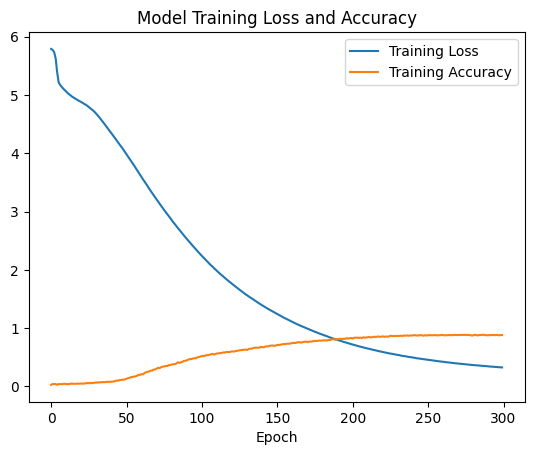

In [ ]:
import matplotlib.pyplot as plt

# ...

# Train the model and get the history
history = train_model(input_dataset)

# Plotting loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.title('Model Training Loss and Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
